# eBOSS QSO v6 3D

## z-dependent selection mask

In [1]:
import matplotlib.pyplot as plt
import nbodykit.lab as nb

In [2]:
plt.rc('font', size=18)

In [3]:
ls /Volumes/TimeMachine/data/eboss/v6/results_ngc.all/clustering/

pk_v6_512.json            pk_v6_wnn_p_512.json      pk_v6_wnnz_p_512.json
pk_v6_wnn_ab_512.json     pk_v6_wnnz_ab_512.json    pk_v6_wsystot_512.json
pk_v6_wnn_abv2_512.json   pk_v6_wnnz_abv2_512.json


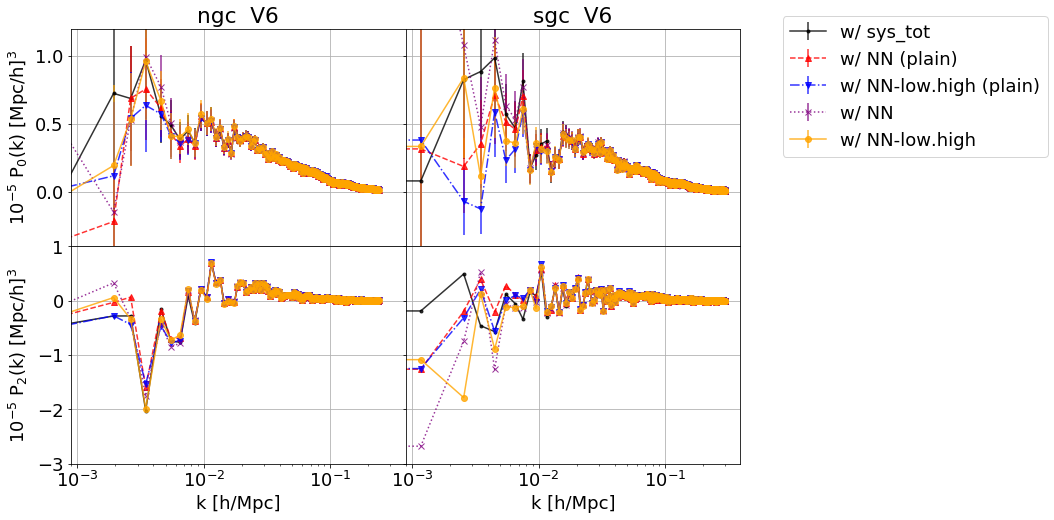

In [7]:
c   = ['k', 'r', 'b', 'purple', 'orange']
ls  = ['-', '--', '-.', ':', '-']
mk  = ['.', '^', 'v', 'x', 'o']
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8), sharey='row', sharex=True)
plt.subplots_adjust(hspace=0., wspace=0)
ax = ax.flatten()

for j,cap in enumerate(['ngc', 'sgc']):
    path = '/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'.all/clustering/'
    wsystot      = nb.ConvolvedFFTPower.load(path + 'pk_v6_wsystot_512.json')
    wsystotnn    = nb.ConvolvedFFTPower.load(path + 'pk_v6_wnn_abv2_512.json')
    wsystotnnp   = nb.ConvolvedFFTPower.load(path + 'pk_v6_wnn_p_512.json')
    #wosystot     = nb.ConvolvedFFTPower.load(path + 'pk_v6_512.json')
    wsystotnnz   = nb.ConvolvedFFTPower.load(path + 'pk_v6_wnnz_p_512.json')    
    wsystotnnz2   = nb.ConvolvedFFTPower.load(path + 'pk_v6_wnnz_abv2_512.json')    
    #pks = [wsystot, wsystotnnp, wsystotnnz, wsystotnnz2, wsystotnn]
    #ttl = ['w/ sys_tot', 'w/ NN', 'w/ NN-low.high', 'w/ NN-low.high w ab', 'w/ NN w ab']
    pks = [wsystot,  wsystotnnp, wsystotnnz, wsystotnn, wsystotnnz2]
    ttl = ['w/ sys_tot', 'w/ NN (plain)', 'w/ NN-low.high (plain)', 'w/ NN', 'w/ NN-low.high' ]

    for i,data in enumerate(pks):    
        err = 1.e-5*data.poles['power_0'].real/(0.5*data.poles['modes'])**0.5
        ax[j].errorbar(data.poles['k'], 1.e-5*(data.poles['power_0'].real-data.attrs['shotnoise']), yerr=err,
                   label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
        #ax[j].plot(data.poles['k'], 1.e-5*(data.poles['power_0'].real-data.attrs['shotnoise']),
        #          label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
    for i,data in enumerate(pks):    
        ax[2+j].errorbar(data.poles['k'], 1.e-5*data.poles['power_2'].real,
                    label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)        
    # j = 0, 1
    ax[j].set_xscale('log')
    ax[j].set_ylim(-.4, 1.2)
    ax[2+j].set_ylim(-3, 1)
    ax[2+j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_title(cap + '  V6')
    if j==0:
        ax[j].set_ylabel(r'10$^{-5}$ P$_{0}$(k) [Mpc/h]$^{3}$')
        ax[2+j].set_ylabel(r'10$^{-5}$ P$_{2}$(k) [Mpc/h]$^{3}$')
    if j == 1:ax[j].legend(bbox_to_anchor=(1.1, 1.1))
for a in ax:a.grid()
fig.align_labels()   
plt.savefig('P0_P2.pdf', bbox_inches='tight')

n(z) distribution

In [1]:
import matplotlib.pyplot as plt
import fitsio as ft
import prepare as pp

camb is not installed!
home is /Users/rezaie


In [2]:
ngc = ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits', lower=True)
sgc = ft.read('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits', lower=True)

In [3]:
ngc.dtype.names

('ra',
 'dec',
 'z',
 'weight_fkp',
 'weight_systot',
 'weight_cp',
 'weight_noz',
 'nz',
 'qso_id')

In [8]:
import numpy as np

In [9]:
np.median?

median z 1.51
mean z 1.51
median z 1.52
mean z 1.52


Text(0,0.5,'Npix')

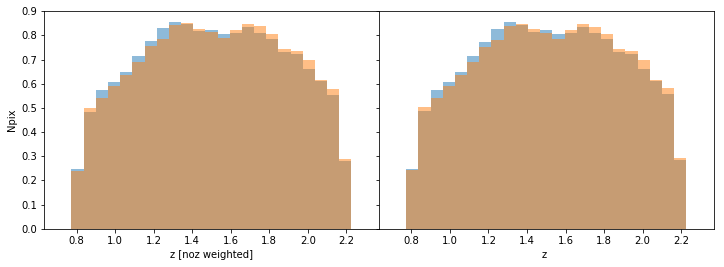

In [18]:
fig, ax =plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plt.subplots_adjust(wspace=0)

for xgc in [ngc, sgc]:
    print('median z %.2f'%np.median(xgc['z']))
    print('mean z %.2f'%np.mean(xgc['z']))
    ax[0].hist(xgc['z'], weights=xgc['weight_noz'], 
               range=(0.71, 2.29), density=True, bins=25, alpha=0.5)
    ax[1].hist(xgc['z'], range=(0.71, 2.29), 
               density=True, bins=25, alpha=0.5)
ax[0].set_xlabel('z [noz weighted]')
ax[1].set_xlabel('z ')
ax[0].set_ylabel('Npix')

## P_0 and P_2 of eBOSS QSOs V6

including HI and run

In [2]:
import matplotlib.pyplot as plt
import nbodykit.lab as nb

In [3]:
plt.rc('font', size=18)

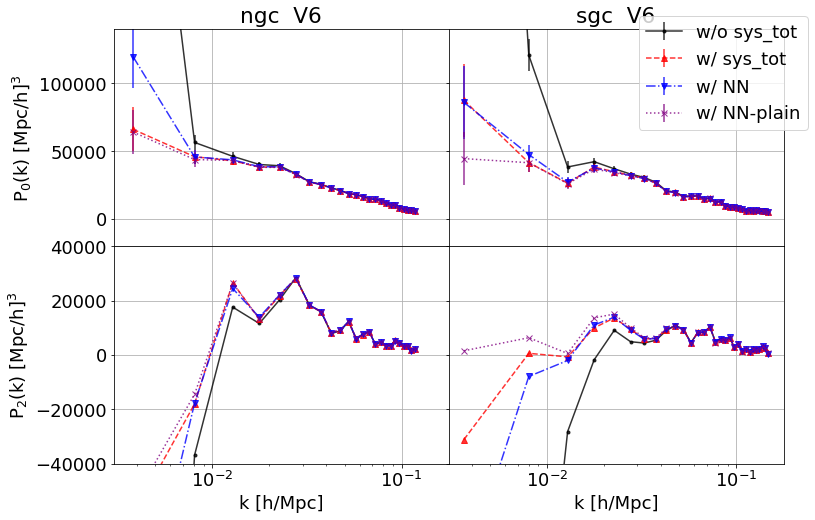

In [11]:
ttl = ['w/o sys_tot', 'w/ sys_tot', 'w/ NN ', 'w/ NN-plain']
c   = ['k', 'r', 'b', 'purple']
ls  = ['-', '--', '-.', ':']
mk  = ['.', '^', 'v', 'x']
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8), sharey='row', sharex=True)
plt.subplots_adjust(hspace=0., wspace=0)
ax = ax.flatten()

for j,cap in enumerate(['ngc', 'sgc']):
    path = '/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/'
    wsystot     = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystot')
    wsystotnn   = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnn')
    wsystotnnp  = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnnp')
    wosystot    = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wosystot')
    for i,data in enumerate([wosystot, wsystot, wsystotnn, wsystotnnp]):    
        err = data.poles['power_0'].real/(0.5*data.poles['modes'])**0.5
        ax[j].errorbar(data.poles['k'], data.poles['power_0'].real-data.attrs['shotnoise'], yerr=err,
                    label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
    for i,data in enumerate([wosystot, wsystot, wsystotnn, wsystotnnp]):    
        ax[2+j].errorbar(data.poles['k'], data.poles['power_2'].real,
                    label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)        
    # j = 0, 1
    ax[j].set_xscale('log')
    ax[j].set_ylim(-2e4, 14e4)

    ax[2+j].set_ylim(-4e4, 4e4)
    ax[2+j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_title(cap + '  V6')
    if j==0:
        ax[j].set_ylabel(r'P$_{0}$(k) [Mpc/h]$^{3}$')
        ax[2+j].set_ylabel(r'P$_{2}$(k) [Mpc/h]$^{3}$')
    if j == 1:ax[j].legend(bbox_to_anchor=(1.1, 1.1))
for a in ax:a.grid()

without HI or mean run

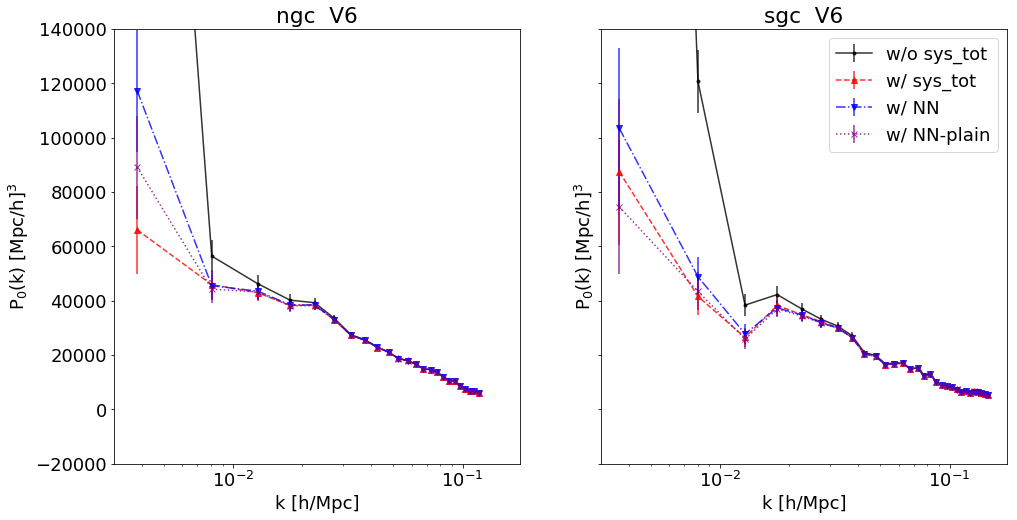

In [3]:
ttl = ['w/o sys_tot', 'w/ sys_tot', 'w/ NN ', 'w/ NN-plain']
c   = ['k', 'r', 'b', 'purple']
ls  = ['-', '--', '-.', ':']
mk  = ['.', '^', 'v', 'x']
fig, ax = plt.subplots(ncols=2, figsize=(16, 8), sharey=True, sharex=True)

for j,cap in enumerate(['ngc', 'sgc']):
    path = '/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/'
    wsystot     = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystot')
    wsystotnn   = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnn')
    wsystotnnp  = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnnp')
    wosystot    = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wosystot')
    for i,data in enumerate([wosystot, wsystot, wsystotnn, wsystotnnp]):    
        err = data.poles['power_0'].real/(0.5*data.poles['modes'])**0.5
        ax[j].errorbar(data.poles['k'], data.poles['power_0'].real-data.attrs['shotnoise'], yerr=err,
                    label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
    # j = 0, 1
    ax[j].set_xscale('log')
    ax[j].set_ylim(-2e4, 14e4)
    ax[j].set_ylabel(r'P$_{0}$(k) [Mpc/h]$^{3}$')
    ax[j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_title(cap + '  V6')
    if j == 1:ax[j].legend()

P_2

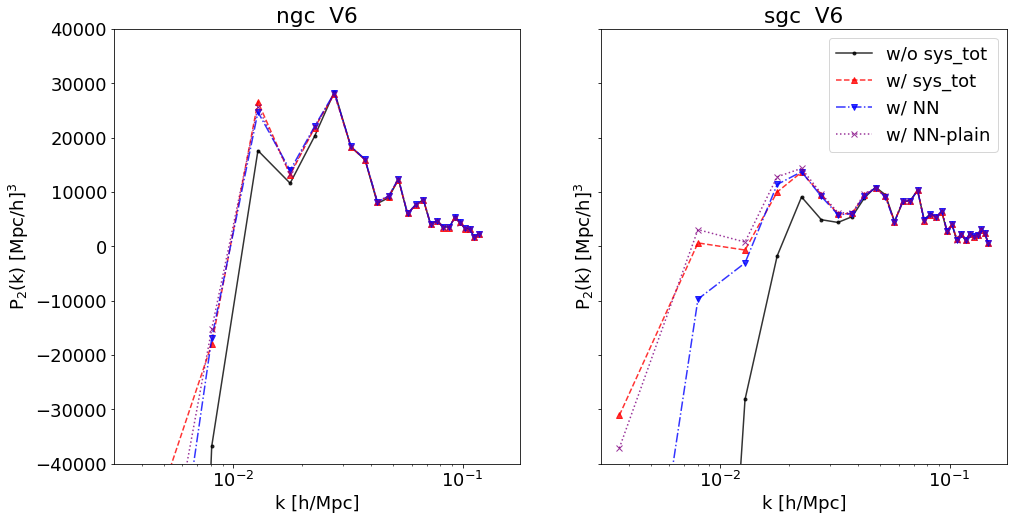

In [4]:
ttl = ['w/o sys_tot', 'w/ sys_tot', 'w/ NN ', 'w/ NN-plain']
c   = ['k', 'r', 'b', 'purple']
ls  = ['-', '--', '-.', ':']
mk  = ['.', '^', 'v', 'x']
fig, ax = plt.subplots(ncols=2, figsize=(16, 8), sharey=True, sharex=True)

for j,cap in enumerate(['ngc', 'sgc']):
    path = '/Volumes/TimeMachine/data/eboss/v6/results_'+cap+'/clustering/'
    wsystot     = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystot')
    wsystotnn   = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnn')
    wsystotnnp  = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wsystotnnp')
    wosystot    = nb.ConvolvedFFTPower.load(path + 'pk_256_p8_2p2_wosystot')
    for i,data in enumerate([wosystot, wsystot, wsystotnn, wsystotnnp]):    
        #err = data.poles['power_2'].real/(0.5*data.poles['modes'])**0.5
        ax[j].plot(data.poles['k'], data.poles['power_2'].real,
                    label=ttl[i], ls=ls[i], c=c[i], marker=mk[i], alpha=0.8)
    # j = 0, 1
    ax[j].set_xscale('log')
    ax[j].set_ylim(-4e4, 4e4)
    ax[j].set_ylabel(r'P$_{2}$(k) [Mpc/h]$^{3}$')
    ax[j].set_xlabel(r'k [h/Mpc]')
    ax[j].set_title(cap + '  V6')
    if j == 1:ax[j].legend()

In [4]:
import fitsio as ft
from glob import glob

In [5]:
cats = glob('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_*.dat.fits')
cats, len(cats)

(['/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnn.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6_wnnp.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnn.dat.fits',
  '/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6_wnnp.dat.fits'],
 6)

In [6]:
for cati in cats:
    catd = ft.read(cati)
    systot = catd['WEIGHT_SYSTOT']
    print(systot.min(), systot.max())

0.8497019275469969 1.4844180349652736
0.9012291501326749 2.0
0.892104021863963 2.0
1.0277115837281166e-30 1.5570564289971904
0.8465537717563315 2.0
0.8415949626794017 2.0


In [31]:
cats = glob('/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_*_v6.dat.fits')

In [27]:
files = glob('/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss*_band_g_nside256_oversamp4_count__total.fits.gz')
files

['/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss21_band_g_nside256_oversamp4_count__total.fits.gz',
 '/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss22_band_g_nside256_oversamp4_count__total.fits.gz',
 '/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss23_band_g_nside256_oversamp4_count__total.fits.gz',
 '/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss25_band_g_nside256_oversamp4_count__total.fits.gz']

In [28]:
import sys
sys.path.append('/Users/rezaie/github/SYSNet/src')

In [15]:
import utils as ut

/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_NGC_v6.dat.fits
/Volumes/TimeMachine/data/eboss/v6/eBOSS_QSO_clustering_SGC_v6.dat.fits
/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss21_band_g_nside256_oversamp4_count__total.fits.gz
/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss22_band_g_nside256_oversamp4_count__total.fits.gz
/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss23_band_g_nside256_oversamp4_count__total.fits.gz
/Volumes/TimeMachine/data/eboss/sysmaps/eboss_nobs/eBOSS_eboss25_band_g_nside256_oversamp4_count__total.fits.gz


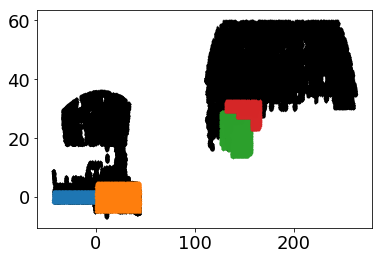

In [35]:
for c in cats:
    print(c)
    catd = ft.read(c)
    gt = catd['RA'] > 300
    catd['RA'][gt] -= 360
    plt.scatter(catd['RA'], catd['DEC'], 1., marker='.', color='k', alpha=0.5)   

for f in files:
    print(f)
    d = ft.read(f)
    ra, dec = ut.hpix2radec(256, d['PIXEL'])
    gt = ra > 300
    ra[gt] -= 360
    plt.scatter(ra, dec, 1.0, marker='.')